In [27]:
from json import loads
from pandas import DataFrame
import numpy as np

In [2]:
path = 'data/url-shortner/usagov_bitly_data2012-03-16-1331923249.txt'
lines = []
with open(path, mode='r') as file:
    for line in file:
        obj = loads(line)
        lines.append(obj)

In [7]:
d1 = DataFrame(lines)
d1

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3555,Mozilla/4.0 (compatible; MSIE 9.0; Windows NT ...,US,1.0,America/New_York,NJ,e5SvKE,fqPSr9,tweetdeckapi,en,1.usa.gov,direct,http://www.fda.gov/AdvisoryCommittees/Committe...,1.331927e+09,1.301298e+09,Paramus,"[40.9445, -74.07]",NaN,NaN
3556,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,US,0.0,America/Chicago,OK,jQLtP4,jQLtP4,bitly,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,http://www.okc.gov/PublicNotificationSystem/Fo...,1.331927e+09,1.307530e+09,Oklahoma City,"[35.4715, -97.518997]",NaN,NaN
3557,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331927e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
3558,GoogleProducer,US,0.0,America/Los_Angeles,CA,zjtI4X,zjtI4X,bitly,NaN,1.usa.gov,direct,http://www.ahrq.gov/qual/qitoolkit/,1.331927e+09,1.327529e+09,Mountain View,"[37.419201, -122.057404]",NaN,NaN


In [8]:
# top 10 timezones where the url shorterning service is used a lot!

In [10]:
d1['tz'].unique()

array(['America/New_York', 'America/Denver', 'America/Sao_Paulo',
       'Europe/Warsaw', '', 'America/Los_Angeles', nan, 'Asia/Hong_Kong',
       'Europe/Rome', 'Africa/Ceuta', 'Europe/Madrid',
       'Asia/Kuala_Lumpur', 'Asia/Nicosia', 'Europe/London',
       'Pacific/Honolulu', 'America/Chicago', 'Europe/Malta',
       'Europe/Lisbon', 'Europe/Paris', 'Europe/Copenhagen',
       'America/Mazatlan', 'Europe/Dublin', 'Europe/Brussels',
       'America/Vancouver', 'Europe/Amsterdam', 'Europe/Prague',
       'Europe/Stockholm', 'America/Anchorage', 'Asia/Bangkok',
       'Europe/Berlin', 'America/Rainy_River', 'Europe/Budapest',
       'Asia/Tokyo', 'Europe/Vienna', 'America/Phoenix', 'Asia/Jerusalem',
       'Asia/Karachi', 'America/Bogota', 'America/Indianapolis',
       'America/Montreal', 'Asia/Calcutta', 'Europe/Skopje',
       'Asia/Beirut', 'Australia/NSW', 'Chile/Continental',
       'America/Halifax', 'America/Edmonton', 'Europe/Bratislava',
       'America/Recife', 'Africa/Ca

In [12]:
s1 = d1['tz']
s1[(s1 == '') | (s1.isnull())]

7          
8          
9          
13      NaN
28         
       ... 
3518    NaN
3531       
3536       
3543    NaN
3551       
Name: tz, Length: 641, dtype: object

In [14]:
s2 = s1.fillna('Missing')
s2[(s2 == '') | (s2.isnull())]

7        
8        
9        
28       
29       
       ..
3512     
3513     
3531     
3536     
3551     
Name: tz, Length: 521, dtype: object

In [17]:
s2[s2 == ''] = 'Missing'
s2[(s2 == '') | (s2.isnull())]

Series([], Name: tz, dtype: object)

In [19]:
d1['tz'] = s2

In [21]:
d1.head(20)

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN
5,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,axNK8c,axNK8c,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273673e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN
6,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,PL,0.0,Europe/Warsaw,77,wcndER,zkpJBR,bnjacobs,"pl-PL,pl;q=0.8,en-US;q=0.6,en;q=0.4",1.usa.gov,http://plus.url.google.com/url?sa=z&n=13319232...,http://www.nasa.gov/mission_pages/nustar/main/...,1.331923e+09,1.331923e+09,Luban,"[51.116699, 15.2833]",NaN,NaN
7,Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...,None,0.0,Missing,NaN,wcndER,zkpJBR,bnjacobs,"bg,en-us;q=0.7,en;q=0.3",1.usa.gov,http://www.facebook.com/,http://www.nasa.gov/mission_pages/nustar/main/...,1.331923e+09,1.331923e+09,NaN,NaN,NaN,NaN
8,Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...,None,0.0,Missing,NaN,wcndER,zkpJBR,bnjacobs,"en-US, en",1.usa.gov,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,http://www.nasa.gov/mission_pages/nustar/main/...,1.331923e+09,1.331923e+09,NaN,NaN,NaN,NaN
9,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,None,0.0,Missing,NaN,zCaLwp,zUtuOu,alelex88,"pt-BR,pt;q=0.8,en-US;q=0.6,en;q=0.4",1.usa.gov,http://t.co/o1Pd0WeV,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,NaN,NaN,NaN,NaN


In [24]:
d2 = d1['tz'].value_counts().head(10)
d2

tz
America/New_York       1251
Missing                 641
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: count, dtype: int64

<Axes: ylabel='tz'>

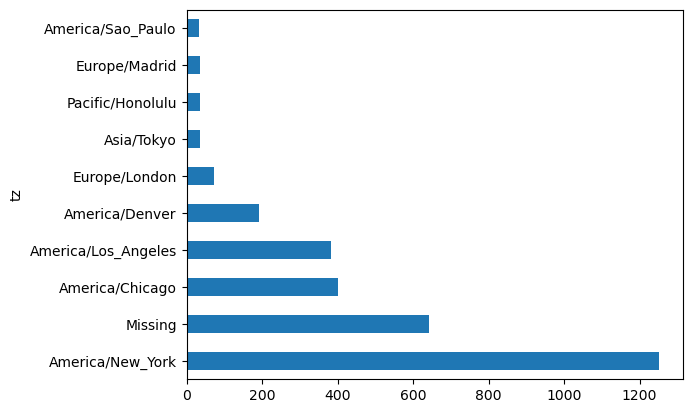

In [25]:
d2.plot(kind='barh')

In [26]:
# top 10 (timezone - operating system) where the url shorterning service is being used a lot!

In [28]:
d3 = np.where(d1['a'].str.contains('Windows'), 'Windows', 'Non-windows')
d3

array(['Windows', 'Non-windows', 'Windows', ..., 'Non-windows',
       'Non-windows', 'Windows'], dtype='<U11')

In [29]:
d1['os'] = d3
d1

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw,os
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN,Windows
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN,Non-windows
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN,Windows
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN,Non-windows
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3555,Mozilla/4.0 (compatible; MSIE 9.0; Windows NT ...,US,1.0,America/New_York,NJ,e5SvKE,fqPSr9,tweetdeckapi,en,1.usa.gov,direct,http://www.fda.gov/AdvisoryCommittees/Committe...,1.331927e+09,1.301298e+09,Paramus,"[40.9445, -74.07]",NaN,NaN,Windows
3556,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,US,0.0,America/Chicago,OK,jQLtP4,jQLtP4,bitly,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,http://www.okc.gov/PublicNotificationSystem/Fo...,1.331927e+09,1.307530e+09,Oklahoma City,"[35.4715, -97.518997]",NaN,NaN,Windows
3557,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331927e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN,Non-windows
3558,GoogleProducer,US,0.0,America/Los_Angeles,CA,zjtI4X,zjtI4X,bitly,NaN,1.usa.gov,direct,http://www.ahrq.gov/qual/qitoolkit/,1.331927e+09,1.327529e+09,Mountain View,"[37.419201, -122.057404]",NaN,NaN,Non-windows


In [30]:
d1[['a', 'os']].head(10)

,a,os
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Windows
1,GoogleMaps/RochesterNY,Non-windows
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,Windows
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,Non-windows
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Windows
5,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Windows
6,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,Windows
7,Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...,Windows
8,Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...,Non-windows
9,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Windows


In [31]:
d4 = d1[['tz', 'os']]
d4

,tz,os
0,America/New_York,Windows
1,America/Denver,Non-windows
2,America/New_York,Windows
3,America/Sao_Paulo,Non-windows
4,America/New_York,Windows
...,...,...
3555,America/New_York,Windows
3556,America/Chicago,Windows
3557,America/Denver,Non-windows
3558,America/Los_Angeles,Non-windows


In [32]:
d4['count'] = 1
d4

/tmp/ipykernel_25199/4154329257.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d4['count'] = 1


,tz,os,count
0,America/New_York,Windows,1
1,America/Denver,Non-windows,1
2,America/New_York,Windows,1
3,America/Sao_Paulo,Non-windows,1
4,America/New_York,Windows,1
...,...,...,...
3555,America/New_York,Windows,1
3556,America/Chicago,Windows,1
3557,America/Denver,Non-windows,1
3558,America/Los_Angeles,Non-windows,1


In [36]:
d5 = d4.pivot_table('count', aggfunc='sum', index='tz', columns=['os'])
d6 = d5.fillna(0)
d6

os,Non-windows,Windows
tz,,
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
...,...,...
Europe/Warsaw,1.0,15.0
Europe/Zurich,4.0,0.0
Missing,245.0,396.0


In [37]:
d7 = d6.loc[d2.index]
d7

os,Non-windows,Windows
tz,,
America/New_York,339.0,912.0
Missing,245.0,396.0
America/Chicago,115.0,285.0
America/Los_Angeles,130.0,252.0
America/Denver,132.0,59.0
Europe/London,43.0,31.0
Asia/Tokyo,2.0,35.0
Pacific/Honolulu,0.0,36.0
Europe/Madrid,16.0,19.0


<Axes: ylabel='tz'>

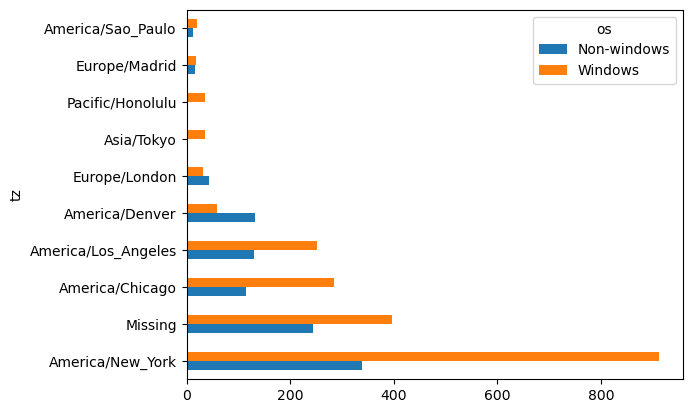

In [38]:
d7.plot(kind='barh')